In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Some Visualizations and Uni-variate analysis

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('salary')
numeric_columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [6]:
cat_columns = [c for c in list(df.columns)if c not in numeric_columns and c != 'salary']
cat_columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

### numeric columns analysis

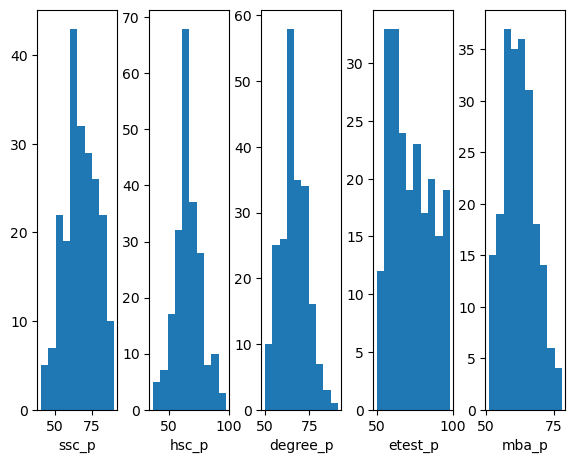

In [7]:
plt.figure(figsize=(8,5))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.subplot(1,6,1)
plt.hist(df['ssc_p'])
plt.xlabel('ssc_p')

plt.subplot(1,6,2)
plt.hist(df['hsc_p'])
plt.xlabel('hsc_p')

plt.subplot(1,6,3)
plt.hist(df['degree_p'])
plt.xlabel('degree_p')

plt.subplot(1,6,4)
plt.hist(df['etest_p'])
plt.xlabel('etest_p')


plt.subplot(1,6,5)
plt.hist(df['mba_p'])
plt.xlabel('mba_p')




plt.show()

In [8]:
Corr_Matrix = round(df[numeric_columns].corr(),2)
Corr_Matrix

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
sl_no,1.00,-0.08,-0.09,-0.09,0.06,0.02
ssc_p,-0.08,1.00,0.51,0.54,0.26,0.39
hsc_p,-0.09,0.51,1.00,0.43,0.25,0.35
degree_p,-0.09,0.54,0.43,1.00,0.22,0.40
etest_p,0.06,0.26,0.25,0.22,1.00,0.22
mba_p,0.02,0.39,0.35,0.40,0.22,1.00


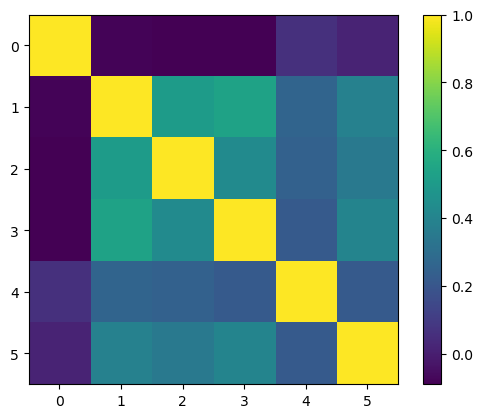

In [9]:
plt.imshow(Corr_Matrix)
plt.colorbar()

ssc_p, hsc_p, etest_p, mba_p and degree_p are correlated to each other

### Categorical columns analysis

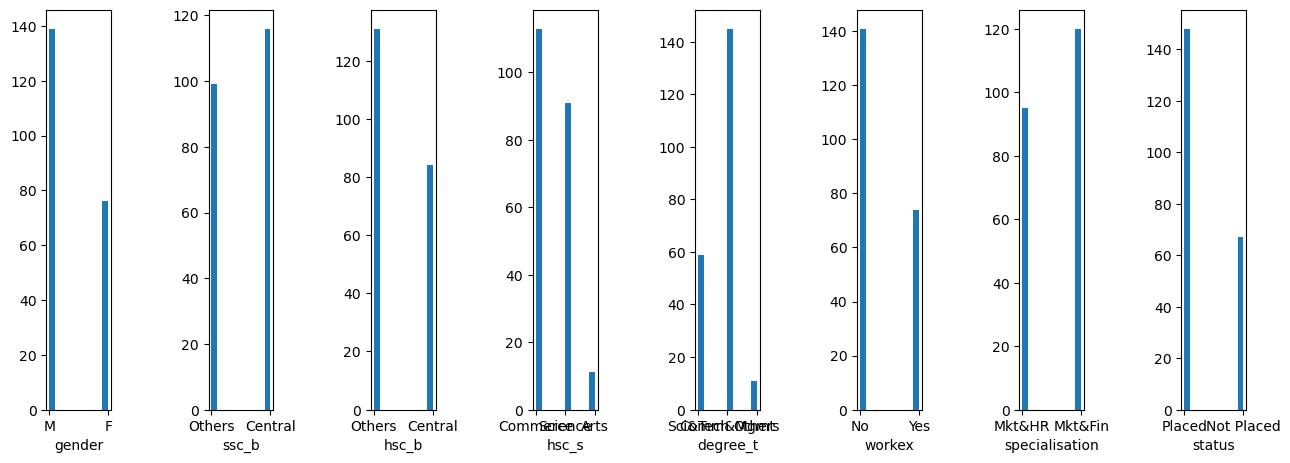

In [10]:
plt.figure(figsize=(8,5))
plt.subplots_adjust(left=0.5,bottom=0.1, right=2, top=0.9, wspace=1.5, hspace=1.5)
for i,c in enumerate(cat_columns):
    plt.subplot(1,len(cat_columns),i+1)
    plt.hist(df[c])
    plt.xlabel(c)

plt.show()

In [11]:
'''cols_without_salary = df.columns.drop('salary')
cols_without_salary'''

"cols_without_salary = df.columns.drop('salary')\ncols_without_salary"

In [12]:
'''df_data = df[cols_without_salary]
df_data'''

'df_data = df[cols_without_salary]\ndf_data'

In [13]:
'''df_without_status = df_data[cols_without_salary.drop('status')]
df_info'''

"df_without_status = df_data[cols_without_salary.drop('status')]\ndf_info"

In [14]:
numeric_aggregated_df = df.groupby('status', as_index=False) \
    .agg(
        ssc_p_mean = ('ssc_p', 'mean'), 
        hsc_p_mean = ('hsc_p', 'mean'),
        degree_p_mean = ('degree_p', 'mean'),
        etest_p_mean = ('etest_p', 'mean'),
        mba_p_mean = ('mba_p', 'mean')
    )
numeric_aggregated_df

,status,ssc_p_mean,hsc_p_mean,degree_p_mean,etest_p_mean,mba_p_mean
0,Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
1,Placed,71.721486,69.926554,68.740541,73.238041,62.579392


In [21]:
workex_aggregated_df = df.groupby(['status', 'workex'], as_index=False) \
    .agg(
        number_of_experiencers = ('sl_no', 'count'),
        ssc_p_mean = ('ssc_p', 'mean'), 
        ssc_p_min = ('ssc_p', 'min'),
        ssc_p_max = ('ssc_p', 'mean'), 
        hsc_p_mean = ('hsc_p', 'mean'),
        hsc_p_min = ('hsc_p', 'min'),
        hsc_p_max = ('hsc_p', 'max'),
        degree_p_mean = ('degree_p', 'mean'),
        degree_p_min = ('degree_p', 'min'),
        degree_p_max = ('degree_p', 'max'),\
        mba_p_mean = ('mba_p', 'mean')
    )
workex_aggregated_df

,status,workex,number_of_experiencers,ssc_p_mean,ssc_p_min,ssc_p_max,hsc_p_mean,hsc_p_min,hsc_p_max,degree_p_mean,degree_p_min,degree_p_max,mba_p_mean
0,Not Placed,No,57,58.129825,40.89,58.129825,58.145263,37.00,82.00,61.291930,50.0,79.00,61.430000
1,Not Placed,Yes,10,54.205000,44.00,54.205000,59.822000,49.80,74.66,60.235000,50.2,67.25,62.655000
2,Placed,No,84,71.220714,52.60,71.220714,70.024762,53.00,97.70,68.721190,56.0,91.00,61.659048
3,Placed,Yes,64,72.378750,49.00,72.378750,69.797656,50.83,97.00,68.765937,56.0,81.00,63.787344


MBA has nothing to do with acceptance

*workex is a criteria for rejection not acceptance 

*hsc_p and degree_p are criteria for acceptance

*etest_p and mba_p are not seriously taken into account

In [22]:
status_gender_aggregated_df = df.groupby(['status', 'gender'], as_index=False) \
    .agg(
        numGender = ('sl_no', 'count'),
        ssc_p_mean = ('ssc_p', 'mean'),
        hsc_p_mean = ('hsc_p', 'mean'),
        degree_p_mean = ('degree_p', 'mean'),
        etest_p_mean = ('etest_p', 'mean'),
    )
status_gender_aggregated_df

,status,gender,numGender,ssc_p_mean,hsc_p_mean,degree_p_mean,etest_p_mean
0,Not Placed,F,28,58.690714,60.479643,63.792500,70.344643
1,Not Placed,M,39,56.720769,56.899231,59.225641,69.044615
2,Placed,F,48,73.922708,70.244375,70.596875,70.734167
3,Placed,M,100,70.664900,69.774000,67.849500,74.439900


No Gender Bias

In [25]:
degree_aggregated_df = df.groupby(['status', 'degree_t'], as_index=False) \
    .agg(
        num=('sl_no', 'count')
    )
degree_aggregated_df

,status,degree_t,num
0,Not Placed,Comm&Mgmt,43
1,Not Placed,Others,6
2,Not Placed,Sci&Tech,18
3,Placed,Comm&Mgmt,102
4,Placed,Others,5
5,Placed,Sci&Tech,41


(array([ 59.,   0.,   0.,   0.,   0., 145.,   0.,   0.,   0.,  11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

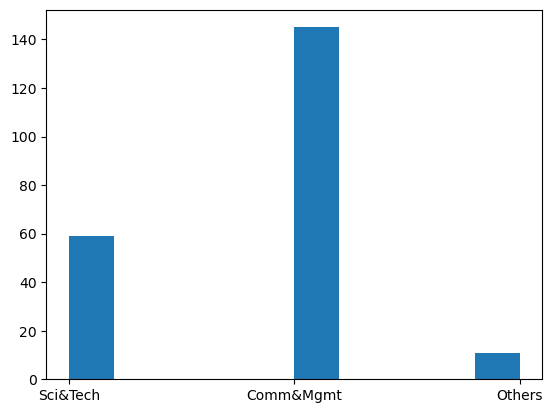

In [27]:
#see ratio of degree_t
plt.hist(df['degree_t'])

degree has nothing to do with accepance

In [30]:
#see if salary is a creiteria for acceptance
salary_aggregated_df = df.groupby(['status', 'gender'], as_index=False)\
    .agg(
        salary=('salary', 'mean')
    )
salary_aggregated_df

,status,gender,salary
0,Not Placed,F,NaN
1,Not Placed,M,NaN
2,Placed,F,267291.666667
3,Placed,M,298910.000000


Females have less salary than males

In [33]:
#further investigation is see by gender having a work experience or not and the salary for each conditin
salary_workex_aggregated_df = df.groupby(['status', 'gender', 'workex'], as_index=False)\
    .agg(
        salary=('salary', 'mean'),
        number=('sl_no', 'count')
    )
salary_workex_aggregated_df

,status,gender,workex,salary,number
0,Not Placed,F,No,NaN,24
1,Not Placed,F,Yes,NaN,4
2,Not Placed,M,No,NaN,33
3,Not Placed,M,Yes,NaN,6
4,Placed,F,No,256800.000000,30
5,Placed,F,Yes,284777.777778,18
6,Placed,M,No,289037.037037,54
7,Placed,M,Yes,310500.000000,46


Males and Females even with no work experience are not equal

#### The features that really affect acceptance are:
    *ssc_p
    *hsc_p
    *degree_p
### The Features that affect rejectoin:
    *workex

### Understanding groups of accepted students

In [34]:
df['total_school_p'] = df['ssc_p'] + df['hsc_p']

In [61]:
accepted_students = df[df['status'] == 'Placed'][['ssc_p', 'hsc_p', 'degree_p']]
accepted_students['cluster'] = 1

#### Which degree specialization is much demanded by corporate?

In [82]:
status_deg_aggregated_df = accepted_students.groupby(['status', 'degree_t']).agg(
    NumAccepted=('sl_no', 'count')
)
status_deg_aggregated_df #the preferred degree is Comm&Mgmt

NumAccepted
status degree_t              
Placed Comm&Mgmt          102
       Others               5
       Sci&Tech            41

In [59]:
not_accepted_students =  df[df['status'] == 'Not Placed'][['ssc_p', 'hsc_p', 'degree_p']]
not_accepted_students['cluster'] = 0

### Do A visualization to understand groups

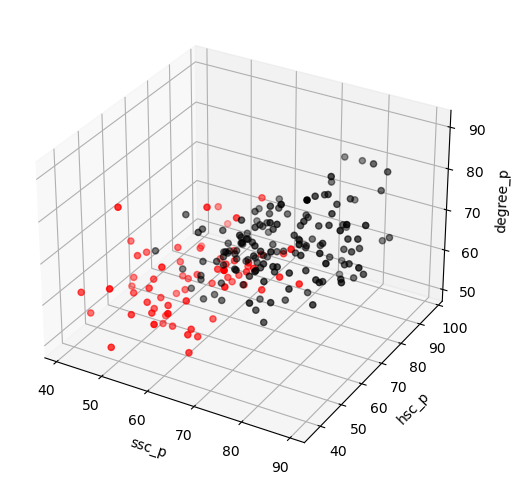

In [63]:
plt.figure(figsize=(8,6))
ax = plt.axes(projection ="3d")
ax.scatter(accepted_students['ssc_p'], accepted_students['hsc_p'], accepted_students['degree_p'], color='black')
ax.scatter(not_accepted_students['ssc_p'], not_accepted_students['hsc_p'], not_accepted_students['degree_p'], color='red')
ax.set_xlabel('ssc_p')
ax.set_ylabel('hsc_p')
ax.set_zlabel('degree_p')
plt.show()

#### injecting work experience with the clusters

In [72]:
workex_accepted_students = df[df['status'] == 'Placed'][['total_school_p', 'workex']]
workex_accepted_students['workex'] = workex_accepted_students['workex'].map({'Yes':1, 'No':0})
workex_accepted_students

,total_school_p,workex
0,158.00,0
1,157.66,1
2,133.00,0
4,159.40,0
7,146.00,1
...,...,...
209,134.00,0
210,162.60,0
211,118.00,0
212,134.00,1


In [73]:
workex_not_accepted_students = df[df['status'] == 'Not Placed'][['total_school_p', 'workex']]
workex_not_accepted_students['workex'] = workex_not_accepted_students['workex'].map({'Yes':1, 'No':0})
workex_not_accepted_students

,total_school_p,workex
3,108.0,0
5,104.8,1
6,95.2,0
9,128.0,0
12,102.0,0
...,...,...
198,137.0,0
201,117.2,0
206,83.0,0
208,103.0,0


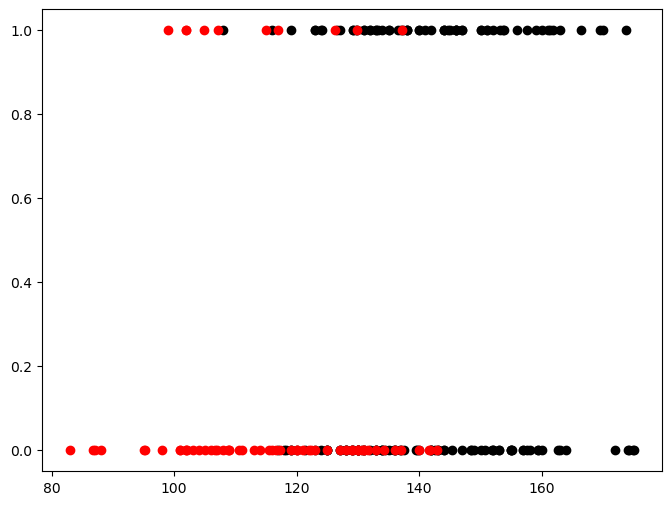

In [78]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.scatter(workex_accepted_students['total_school_p'], workex_accepted_students['workex'], color='black')
ax.scatter(workex_not_accepted_students['total_school_p'], workex_not_accepted_students['workex'], color='red')
plt.show()

## Conclusion for placement analysis
#### ssc_p, hsc_p, degree_p are criteria for placement
#### workex are criteria for Not-Placement

## Analysis for salary in accepted students

In [79]:
accepted_students = df[df['status'] == 'Placed']
accepted_students

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,total_school_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,158.00
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,157.66
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,133.00
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,159.40
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0,146.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0,134.00
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,162.60
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,118.00
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,134.00


In [84]:
accepted_students['total_school_p'] = accepted_students['ssc_p'] + accepted_students['hsc_p'] + accepted_students['degree_p']
accepted_students.drop(['ssc_p', 'hsc_p', 'degree_p'], inplace=True, axis=1)
accepted_students

,sl_no,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,mba_p,status,salary,total_school_p
0,1,M,Others,Others,Commerce,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,216.00
1,2,M,Central,Others,Science,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,235.14
2,3,M,Central,Central,Arts,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,197.00
4,5,M,Central,Central,Commerce,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,232.70
7,8,M,Central,Central,Science,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0,212.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,Central,Central,Commerce,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0,199.00
210,211,M,Others,Others,Commerce,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,240.20
211,212,M,Others,Others,Science,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,190.00
212,213,M,Others,Others,Commerce,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,207.00


In [86]:
accepted_students.groupby('gender').agg(
    MeanSalary=('salary', 'mean')
)

,MeanSalary
gender,
F,267291.666667
M,298910.000000


In [87]:
accepted_students.groupby(['gender']).agg(
    MeanSalary=('salary', 'mean'),
    MeanTotalSchoolDegree=('total_school_p', 'mean')
)

,MeanSalary,MeanTotalSchoolDegree
gender,,
F,267291.666667,214.763958
M,298910.000000,208.288400


In [88]:
accepted_students.groupby(['gender', 'degree_t']).agg(
    MeanSalary=('salary', 'mean'),
    MeanTotalSchoolDegree=('total_school_p', 'mean')
)

MeanSalary  MeanTotalSchoolDegree
gender degree_t                                       
F      Comm&Mgmt  266303.030303             215.534545
       Others     288000.000000             207.475000
       Sci&Tech   262727.272727             215.102727
M      Comm&Mgmt  284521.739130             206.293623
       Others     250000.000000             202.330000
       Sci&Tech   333633.333333             213.075000

#### It Seems Clearly that Males are more rewarded than Females even of they are more qualified 
#### Sci&Tech are more rewading than other degrees

In [93]:
accepted_students.groupby(['workex']).agg(
    MeanSalary=('salary', 'mean'),
    MeanTotalSchoolDegree=('total_school_p', 'mean')
)

,MeanSalary,MeanTotalSchoolDegree
workex,,
No,277523.809524,209.966667
Yes,303265.625000,210.942344


#### Work Experience is more rewarding than No Work Experience

In [108]:
cuts = [0,accepted_students['salary'].quantile(0.25),accepted_students['salary'].quantile(0.50),accepted_students['salary'].quantile(0.75),accepted_students['salary'].max()+1]
accepted_students['cut_salary'] = pd.cut(x=accepted_students['salary'], bins=cuts, labels=['first', 'second', 'third', 'fourth'])
accepted_students['cut_salary']

/tmp/ipykernel_4889/1093598014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_students['cut_salary'] = pd.cut(x=accepted_students['salary'], bins=cuts, labels=['first', 'second', 'third', 'fourth'])


0       third
1       first
2      second
4      fourth
7      second
        ...  
209     first
210    fourth
211     third
212     third
213     first
Name: cut_salary, Length: 148, dtype: category
Categories (4, object): ['first' < 'second' < 'third' < 'fourth']

In [110]:
#see mean total_school_p and mean etest_p and mean mba_b for each salary_cut
accepted_students.groupby('cut_salary').agg(
    MeanTotalSchoolP=('total_school_p', 'mean'),
    MeanEtestP=('etest_p', 'mean'),
    MeanMbaP=('mba_p', 'mean'),
)

,MeanTotalSchoolP,MeanEtestP,MeanMbaP
cut_salary,,,
first,209.118182,72.018182,62.475455
second,204.866857,66.140286,60.480857
third,213.922439,76.710000,62.359024
fourth,214.112500,78.943214,65.688571


#### The higher the percentages, the higher the salary

In [ ]:
accepted_students.groupby(['cut_salary', 'workex'])